In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month #'] = pd.to_datetime(df_US_pivot['job_posted_month'], format=('%B')).dt.month
df_US_pivot.sort_values('month #', inplace=True)
df_US_pivot.set_index('job_posted_month', inplace=True) 
df_US_pivot.drop(columns='month #', inplace=True)
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [6]:
# Se lee la tabla csv por el link y se establece la columna que servira de index alli mismo.
df_US_soft_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')
df_US_soft_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [8]:
df_US_merged = df_US_pivot.merge(df_US_soft_pivot, on='job_posted_month')
df_US_merged 

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [15]:
top_7 = df_US_merged.sum().sort_values(ascending=False).head(7)
top_7 = top_7.index.tolist()
top_7 

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist',
 'UI/UX Designer',
 'Data Engineer']

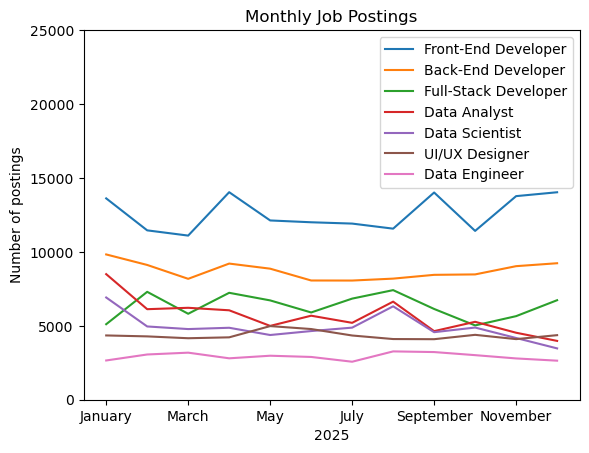

In [19]:
df_US_merged[top_7].plot(kind='line')
plt.title('Monthly Job Postings')
plt.xlabel('2025')
plt.ylabel('Number of postings')
plt.ylim(0,25000)
plt.legend()
plt.show()

Ejercicios de Merge

In [20]:
# Create a DataFrame df_us_jobs that contains only job postings in the United States.
# Then, create another DataFrame df_monthly_postings that counts the number of U.S. job postings for each month.
# Merge these two DataFrames on the job_posted_month column using a right join, and display the first 5 rows of the resulting DataFrame.

In [39]:
df_US_jobs = df[df['job_country'] == 'United States'].copy()
df_US_jobs['job_posted_month'] = df_US_jobs['job_posted_date'].dt.strftime('%B')
df_month_post = df_US_jobs.groupby('job_posted_month').size().reset_index(name='posting_count')
df_job_merged = df_US_jobs.merge(df_month_post, how='right', on='job_posted_month')
df_job_merged.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,posting_count
0,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April,17282
1,Data Scientist,"Data Scientist, Data Strategy and Analytics","Alameda, CA",via Trabajo.org,Full-time,False,"California, United States",2023-04-26 13:05:10,False,False,United States,None,NaN,NaN,Abbott,None,None,April,17282
2,Senior Data Scientist,"Mission Data Scientist, Senior - Security Clea...","Fayetteville, NC",via My Panhandle Jobs,Full-time,False,Georgia,2023-04-09 14:21:49,False,True,United States,None,NaN,NaN,Booz Allen Hamilton,"['python', 'r', 'postgresql', 'pandas', 'table...","{'analyst_tools': ['tableau', 'splunk'], 'data...",April,17282
3,Data Engineer,Data Engineer,"Las Vegas, NV",via Trabajo.org,Full-time,False,"Illinois, United States",2023-04-28 13:09:58,True,False,United States,None,NaN,NaN,Indotronix International Corporation,"['python', 'shell', 'azure', 'databricks', 'ai...","{'cloud': ['azure', 'databricks'], 'libraries'...",April,17282
4,Data Analyst,HR Data Analyst - Remote,Anywhere,via ZipRecruiter,Full-time,True,"California, United States",2023-04-24 13:00:47,False,False,United States,None,NaN,NaN,Workoo Technologies,"['sas', 'sas', 'sql']","{'analyst_tools': ['sas'], 'programming': ['sa...",April,17282


In [40]:
# Create a DataFrame df_not_remote_jobs that contains only job postings that do not offer remote work (job_work_from_home == False).
# From df_not_remote_jobs, calculate the average yearly salary (salary_year_avg) for each job title (job_title_short).
# Store the result in a new DataFrame df_not_remote_salary.
# Rename the salary column to salary_not_remote_avg.
# Merge df_not_remote_jobs and df_not_remote_salary on the job_title_short column using a right join.
# Display the first 5 rows of the resulting DataFrame.

In [ ]:
df_not_remote_jobs = df[df['job_work_from_home'] == False]
df_not_remote_sal = df_not_remote_jobs.groupby('job_title_short')['salary_year_avg'].mean()
df_not_remote_sal = df_not_remote_sal.reset_index(name='salary_not_remote_avg')
df_remote_merged = df_not_remote_jobs.merge(df_not_remote_sal, how='right', on='job_title_short')
df_remote_merged.head()

# RENOMBRAR COLUMNAS
# df_not_remote_salary.rename(columns={'salary_year_avg': 'salary_not_remote_avg'}, inplace=True)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_not_remote_avg
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",90177.41994
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",90177.41994
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",90177.41994


In [48]:
# Create a DataFrame df_company_salary that calculates the average yearly salary for each company.
# Then, create another DataFrame df_company_remote that counts the number of remote job postings for each company. Name this count column remote_count.
# Merge these two DataFrames on the company_name column using an inner join and display the first 5 rows of the resulting DataFrame.

In [57]:
df_company_salary = df.copy()
df_comp_sal_mean = df_company_salary.groupby('company_name')['salary_year_avg'].mean().reset_index()

df_company_remote = df.copy()
df_company_remote = df[df['job_work_from_home'] == True]
df_company_sal_avg = df_company_remote.groupby('company_name')['job_work_from_home'].size().reset_index()
df_company_sal_avg.rename(columns={'job_work_from_home':'remote_count'}, inplace=True)

df_company_merged = df_comp_sal_mean.merge(df_company_sal_avg, on='company_name', how='inner')
df_company_merged.head()

,company_name,salary_year_avg,remote_count
0,#EqualsTrue,NaN,4
1,#TeamGoHealth,NaN,1
2,#twiceasnice Recruiting,77750.0,1
3,&Work,NaN,1
4,"(AEG) Application Engineering Group, Inc.",NaN,1


Otros ejercicios

In [59]:
#Ejemplo base

df1 = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'nombre': ['Ana', 'Luis', 'María', 'Juan']
})

df2 = pd.DataFrame({
    'id': [3, 4, 5, 6],
    'salario': [1000, 1200, 900, 1100]
})


In [60]:
inner_merge = pd.merge(df1, df2, on='id', how='inner')
print(inner_merge)

   id nombre  salario
0   3  María     1000
1   4   Juan     1200


In [61]:
left_merge = pd.merge(df1, df2, on='id', how='left')
print(left_merge)


   id nombre  salario
0   1    Ana      NaN
1   2   Luis      NaN
2   3  María   1000.0
3   4   Juan   1200.0


In [62]:
right_merge = pd.merge(df1, df2, on='id', how='right')
print(right_merge)


   id nombre  salario
0   3  María     1000
1   4   Juan     1200
2   5    NaN      900
3   6    NaN     1100


In [63]:
outer_merge = pd.merge(df1, df2, on='id', how='outer')
print(outer_merge)


   id nombre  salario
0   1    Ana      NaN
1   2   Luis      NaN
2   3  María   1000.0
3   4   Juan   1200.0
4   5    NaN    900.0
5   6    NaN   1100.0


In [64]:
df3 = pd.DataFrame({
    'empleado_id': [1, 2, 3],
    'ciudad': ['Bogotá', 'Medellín', 'Cali']
})

merge_diff = pd.merge(df1, df3, left_on='id', right_on='empleado_id')
print(merge_diff)


   id nombre  empleado_id    ciudad
0   1    Ana            1    Bogotá
1   2   Luis            2  Medellín
2   3  María            3      Cali


In [65]:
dfA = pd.DataFrame({
    'pais': ['CO', 'CO', 'MX'],
    'año': [2022, 2023, 2023],
    'ventas': [100, 200, 150]
})

dfB = pd.DataFrame({
    'pais': ['CO', 'MX', 'CO'],
    'año': [2023, 2023, 2022],
    'impuestos': [20, 30, 15]
})

merge_multi = pd.merge(dfA, dfB, on=['pais', 'año'], how='inner')
print(merge_multi)


  pais   año  ventas  impuestos
0   CO  2022     100         15
1   CO  2023     200         20
2   MX  2023     150         30
